In [78]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as po
import plotly.express as px
import plotly.io as pio

In [79]:
covid=pd.read_csv('C:\\Users\\DELL\\Desktop\\COVID_DATA.csv')
covid.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
#convert covid data into dataframe to use seaborn graph
df=pd.DataFrame(covid)
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [53]:
covid.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [54]:
covid_df=covid.set_index('State')
covid_df.head(2)

,Date,Region,Confirmed,Deaths,Recovered
State,,,,,
NaN,4/29/2020,Afghanistan,1939,60,252
NaN,4/29/2020,Albania,766,30,455


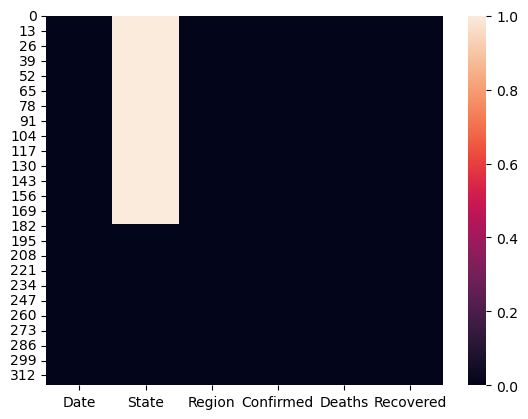

In [55]:
#heatmap
covid_df=sn.heatmap(covid.isnull())

Q1.) SHOW THE NUMBER OF CONFIRMED , DEATHS AND RECOVERED CASES IN EACH REGION ?

In [86]:
covid.groupby('Region').sum().head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7996\1149512842.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid.groupby('Region').sum().head(5)


,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7


In [61]:
# IN WHICH REGION ,MAXIMUM NUMBER OF CONFIRMED CASES WERE RECORDED?
covid.groupby('Region').Confirmed.sum().sort_values(ascending=False)

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Suriname           10
Gambia             10
Holy See           10
Name: Confirmed, Length: 180, dtype: int64

In [24]:
covid.groupby('Region')['Confirmed','Recovered'].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3176\1839298319.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid.groupby('Region')['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


Q2) REMOVE ALL THE RECORD WHERE CONFIRMED CASES IS LESS THEN 10.

In [39]:
covid.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [42]:
# see all the confirmed are less than 10
covid[covid.Confirmed < 10]


,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [57]:
#(~) this siqn delete every record are lower than 10
covid=covid[~(covid.Confirmed < 10)]
covid

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


Q3) IN WHICH REGION ,MINIMUM NUMBER OF DEATHs CASES WERE RECORDED?

In [67]:
covid.groupby('Region').Deaths.sum().sort_values(ascending=True)

Region
Cambodia                        0
Seychelles                      0
Saint Lucia                     0
Central African Republic        0
Saint Kitts and Nevis           0
                            ...  
France                      24121
Spain                       24275
UK                          26165
Italy                       27682
US                          60967
Name: Deaths, Length: 180, dtype: int64

Q4) HOW MANY CONFIRMED .DEATHS,RECOVERED CASES WERE REPORTED FROM INDIA.

In [68]:
covid[covid.Region=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


Q5) SORT THE ENTIRE DATA WITH NO OF CONFIRMED CASES IN ASCENDING ORDER

In [71]:
covid.sort_values(by=['Confirmed'],ascending=True).head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,NaN,Seychelles,11,0,6
27,4/29/2020,NaN,Burundi,11,1,4
306,4/29/2020,Turks and Caicos Islands,UK,12,1,5
118,4/29/2020,NaN,Nicaragua,13,3,7


Q6) SORT THE ENTIRE DATA WITH NO OF RECOVERED CASES IN DESCENDING ORDER ?

In [75]:
#by default descending order
covid.sort_values(by=['Recovered'])

,Date,State,Region,Confirmed,Deaths,Recovered
199,4/29/2020,Colorado,US,14758,766,0
276,4/29/2020,Ontario,Canada,16978,1153,0
116,4/29/2020,NaN,Netherlands,38802,4711,0
246,4/29/2020,Manitoba,Canada,275,6,0
277,4/29/2020,Oregon,US,2446,101,0
...,...,...,...,...,...,...
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
80,4/29/2020,NaN,Italy,203591,27682,71252
76,4/29/2020,NaN,Iran,93657,5957,73791
61,4/29/2020,NaN,Germany,161539,6467,120400


<Axes: xlabel='Confirmed', ylabel='Deaths'>

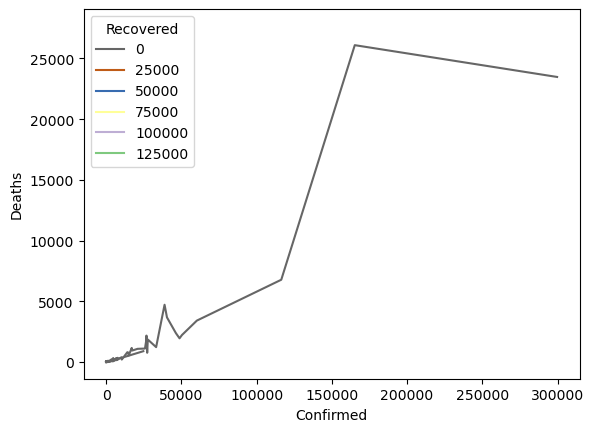

In [89]:
sn.lineplot(x ='Confirmed',y='Deaths',hue='Recovered',palette='Accent_r',data=covid)

In [6]:
covid.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455


In [67]:
pio.renderers.default='notebook'

In [80]:
fig=px.choropleth(covid,locations="Region",color="Deaths",scope="asia",
                        color_continuous_scale="sunsetdark",title="covid_cases",)

fig.show()

In [81]:
fig=px.choropleth(covid,locations="Region",color="Date",scope="asia",hover_name="Region",hover_data=["State"],
                        color_continuous_scale="sunsetdark",animation_frame="Date",title="covid_cases",
                  color_discrete_map={'High':'red', 'Moderate':'Yellow','Low':'Green'})

fig.show()

In [82]:
fig=px.choropleth(covid,locations="State",color="Deaths",scope="europe",hover_name="Deaths",hover_data=["State"],
                        animation_frame="Date",title="COVID CASES")
fig.show()